In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [2]:
df = pd.read_excel(r'C:\Users\Asus\2019_Project\Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
filter_df=df[['Country','CustomerID']].drop_duplicates()

In [6]:
filter_df.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


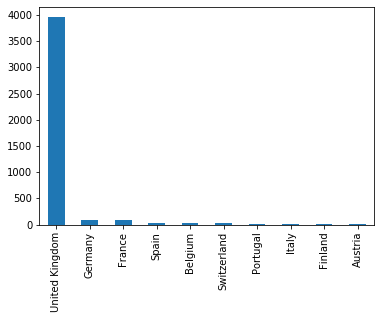

In [7]:
filter_df.Country.value_counts()[:10].plot(kind='bar')

* In this dataset, we can observe most of the customers are from the "United Kingdom". So, we can filter data for United Kingdom customer.

In [8]:
uk_data=df[df.Country=='United Kingdom']

In [9]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      495478 non-null object
StockCode      495478 non-null object
Description    494024 non-null object
Quantity       495478 non-null int64
InvoiceDate    495478 non-null datetime64[ns]
UnitPrice      495478 non-null float64
CustomerID     361878 non-null float64
Country        495478 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [11]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


* Here, we can observe some of the customers have ordered in a negative quantity, which is not possible. So, we need to filter Quantity greater than zero.

In [12]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      486286 non-null object
StockCode      486286 non-null object
Description    485694 non-null object
Quantity       486286 non-null int64
InvoiceDate    486286 non-null datetime64[ns]
UnitPrice      486286 non-null float64
CustomerID     354345 non-null float64
Country        486286 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


In [13]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,486286.000000,486286.000000,354345.000000
mean,9.734640,3.794976,15552.436219
std,163.262428,41.271159,1594.546025
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15522.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,13541.330000,18287.000000


## Filtering the dataset for furthur analysis

* Here, we can filter the necessary columns for RFM analysis. we need five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. CustomerId will uniquely define your customers, InvoiceDate help us to calculate recency of purchase, InvoiceNo helps us to count the number of time transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help us to calculate the total purchased amount.

In [14]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [15]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [16]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [17]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [18]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

* 2010-12-01 is the first purchase of customer and 2011-12-09 is the last purchse made

In [19]:
PRESENT = dt.datetime(2011,12,10)

* we have set present date to day after last purchase made. we need for futher calculation.

In [20]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [21]:
uk_data.head(10)

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
5,17850.0,2010-12-01 08:26:00,536365,2,7.65,15.30
6,17850.0,2010-12-01 08:26:00,536365,6,4.25,25.50
7,17850.0,2010-12-01 08:28:00,536366,6,1.85,11.10
8,17850.0,2010-12-01 08:28:00,536366,6,1.85,11.10
9,13047.0,2010-12-01 08:34:00,536367,32,1.69,54.08


### CLV using RFM Analysis
* RFM Analysis (customer segmention)
* Here, we are going to perform following opertaions:
* For Recency, Calculate the number of days between present date and date of last purchase each customer.
* For Frequency, Calculate the number of orders for each customer.
* For Monetary, Calculate sum of purchase price for each customer.

### On Customer_ID, we have calculated recency, frequency, monetary.

In [22]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [23]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [24]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [25]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [26]:
rfm['recency'] = rfm['recency'].astype(int)

In [27]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
recency      3921 non-null int32
frequency    3921 non-null int64
monetary     3921 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 107.2 KB


### Computing Quantile of RFM values
* Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.
* The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.
* qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [28]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])    # 1 is low and 4 is high
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])  # 4 is low and 1 is high
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])   # 4 is low and 1 is high

In [29]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


### RFM Interpretation
* Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help us to segment the customers well group.

In [30]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


* Here we know recency should be lowest i.e 1, frequency should be highest i.e 1, monetary should be highest i.e 1.

In [31]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111


* The RFM_Score with 111 is TOp/Best customers.

### CLV using the equation: CLV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
* Average Order Value(AOV): The Average Order value is the ratio of your total revenue and the total number of orders. AOV represents the mean amount of revenue that the customer spends on an order.
* Purchase Frequency(PF): Purchase Frequency is the ratio of the total number of orders and the total number of customer. It represents the average number of orders placed by each customer.
* Churn Rate: Churn Rate is the percentage of customers who have not ordered again.
* Repeat Rate: Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers. Example: If you have 10 customers in a month out of who 4 come back, your repeat rate is 40%.

In [32]:
uk_data.head(10)

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
5,17850.0,2010-12-01 08:26:00,536365,2,7.65,15.30
6,17850.0,2010-12-01 08:26:00,536365,6,4.25,25.50
7,17850.0,2010-12-01 08:28:00,536366,6,1.85,11.10
8,17850.0,2010-12-01 08:28:00,536366,6,1.85,11.10
9,13047.0,2010-12-01 08:34:00,536367,32,1.69,54.08


### Here, we are going to perform the following operations:

* Calculate the number of days between the present date and the date of last purchase from each customer.
* Calculate the number of orders for each customer.
* Calculate sum of purchase price for each customer.

In [33]:
uk_df_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPrice': lambda price: price.sum()})

In [34]:
uk_df_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPrice
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [35]:
# Changing the name of columns
uk_df_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_df_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


### Calculating the CLV using the following formula
* CLV = ((Average Order Value * Purchase Frequency)/Churn Rate) * Profit margin.

In [36]:
# calculating Average Order Value
uk_df_group['avg_order_value']=uk_df_group['spent_money']/uk_df_group['num_transactions']

In [37]:
uk_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [38]:
# calculating the purchase_frequency
purchase_frequency=sum(uk_df_group['num_transactions'])/uk_df_group.shape[0]

* Churn Rate: Churn Rate is the percentage of customers who have not ordered again.
* Repeat Rate: Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers. Example: If you have 10 customers in a month out of who 4 come back, your repeat rate is 40%.

In [39]:
# calculating Repeat Rate
repeat_rate=uk_df_group[uk_df_group.num_transactions > 1].shape[0]/uk_df_group.shape[0]

In [40]:
# calculating Churn Rate
churn_rate=1-repeat_rate

In [41]:
print(purchase_frequency,repeat_rate,churn_rate)

90.37107880642694 0.9818923743942872 0.018107625605712774


* Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume business has approx 5% profit on the total sale.

In [42]:
# Calculate Profit Margin
uk_df_group['profit_margin']=uk_df_group['spent_money']*0.05

In [43]:
uk_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


In [44]:
uk_df_group1 = uk_df_group

In [45]:
uk_df_group1.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


### Calculating Customer Lifetime Value

In [46]:
# Customer Value
uk_df_group['cust_val']=(uk_df_group['avg_order_value']*purchase_frequency)/churn_rate

In [47]:
#Customer Lifetime Value
uk_df_group['cust_lifetime_value']=uk_df_group['cust_val']*uk_df_group['profit_margin']

In [48]:
uk_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,cust_val,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


### CLV using the 2nd equation: CLV = profit margin X (Retention rate / (1 + Rate Of Discount – Retention rate))

In [49]:
# Calculate Profit Margin
uk_df_group1['discount_rate']=uk_df_group1['spent_money']*0.10

In [50]:
uk_df_group1.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,cust_val,cust_lifetime_value,discount_rate
CustomerID,,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12,7718.360
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07,419.601
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07,3371.973
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07,409.088
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06,94.234


In [52]:
uk_df_group1['CLV']= uk_df_group1['profit_margin']*(repeat_rate/(1+uk_df_group1['discount_rate']-repeat_rate))

In [53]:
uk_df_group1.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,cust_val,cust_lifetime_value,discount_rate,CLV
CustomerID,,,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12,7718.360,0.490945
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07,419.601,0.490925
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07,3371.973,0.490944
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07,409.088,0.490924
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06,94.234,0.490852
